In [1]:
# Import pyproteome and initialize other packages
from pyproteome import *
%import_all

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Set location of .msf data directory
paths.MS_SEARCHED_NAME = "CK Searched"
paths.set_base_dir(paths.find_base_dir())

# Specify sample IDs assigned to each TMT channel
ck_channels = OrderedDict(
    [
        ("3130 CK",     "126"),
        ("3131 CK-p25", "127"),
        ("3145 CK-p25", "128"),
        ("3146 CK-p25", "129"),
        ("3148 CK",     "130"),
        ("3157 CK",     "131"),
    ]
)
ckh_channels = OrderedDict([
    ("{} Hip".format(key), val)
    for key, val in ck_channels.items()
])
ckx_channels = OrderedDict([
    ("{} Cortex".format(key), val)
    for key, val in ck_channels.items()
])
ckc_channels = OrderedDict([
    ("{} Cere".format(key), val)
    for key, val in ck_channels.items()
])

# Specify sample-group assignment
ckp25_groups = OrderedDict(
    [
        (
            "CK",
            [
                "3130 CK",
                "3148 CK",
                "3157 CK",
            ],
        ),
        (
            "CK-p25",
            [
                "3131 CK-p25",
                "3145 CK-p25",
                "3146 CK-p25",
            ],
        ),
    ]
)
ckp25_groups.update([
    ("{} {}".format(key, tissue), ["{} {}".format(i, tissue) for i in val])
    for tissue in ["Hip", "Cortex", "Cere"]
    for key, val in ckp25_groups.items()
])

cmp_groups = [
    ("CK Hip", "CK-p25 Hip"),
    ("CK Cortex", "CK-p25 Cortex"),
    ("CK Cere", "CK-p25 Cere"),
]

ck_groups = [
    "CK-p25 Hip", "CK-p25 Cortex",
]

wt_groups = [
    "CK Hip", "CK Cortex",
]

10:06:46 PM	pyproteome.discoverer	INFO	CK-C1-Global: Loading ProteomeDiscoverer peptides...
10:06:46 PM	pyproteome.discoverer	INFO	CK-C1-Global: -- Reassigned 40 phosphosites using phosphoRS
10:06:47 PM	pyproteome.discoverer	INFO	CK-C1-Global: Loaded 1665 peptides
10:06:47 PM	pyproteome.data_sets	WARNING	CK-C1-Global: Unable to locate raw file for 2015-11-13-CKC1-pY-sup-10-pre52-col40.raw
10:06:47 PM	pyproteome.data_sets	INFO	CK-C1-Global: Data Set Statistics:
10:06:47 PM	pyproteome.data_sets	INFO	CK-C1-Global: -- 48 pY - 261 pST (16% phospho specificity)
10:06:47 PM	pyproteome.data_sets	INFO	CK-C1-Global: -- 1665 total peptides - 922 unique proteins
10:06:47 PM	pyproteome.data_sets	INFO	CK-C1-Global: -- 38% of phosphopeptides have an ambiguous assignment
10:06:47 PM	pyproteome.data_sets	INFO	CK-C1-Global: -- 91% labeled - 14% underlabeled
10:06:47 PM	pyproteome.data_sets	INFO	CK-C1-Global: -- 0.4 mean missed cleavages
10:06:47 PM	pyproteome.data_sets	INFO	CK-C1-Global: Filtering pepti

CK Hip: (2400, 31)
CK Cortex: (3564, 31)
CK All: (5502, 55)


OrderedDict([('CK-C1-Global',
              <pyproteome.data_sets.data_set.DataSet at 0x1f54134d710>),
             ('CK-C1-MPM2',
              <pyproteome.data_sets.data_set.DataSet at 0x1f54134d6d8>),
             ('CK-C1-pY',
              <pyproteome.data_sets.data_set.DataSet at 0x1f541ad1240>),
             ('CK-H1-Global',
              <pyproteome.data_sets.data_set.DataSet at 0x1f5431a13c8>),
             ('CK-H1-MPM2',
              <pyproteome.data_sets.data_set.DataSet at 0x1f541bc2668>),
             ('CK-H1-pST',
              <pyproteome.data_sets.data_set.DataSet at 0x1f5449f4438>),
             ('CK-H1-pY',
              <pyproteome.data_sets.data_set.DataSet at 0x1f5417bdef0>),
             ('CK-H2-Global',
              <pyproteome.data_sets.data_set.DataSet at 0x1f542f058d0>),
             ('CK-H2-MPM2',
              <pyproteome.data_sets.data_set.DataSet at 0x1f5419d8668>),
             ('CK-H2-pY',
              <pyproteome.data_sets.data_set.DataSet at 0x1f5461

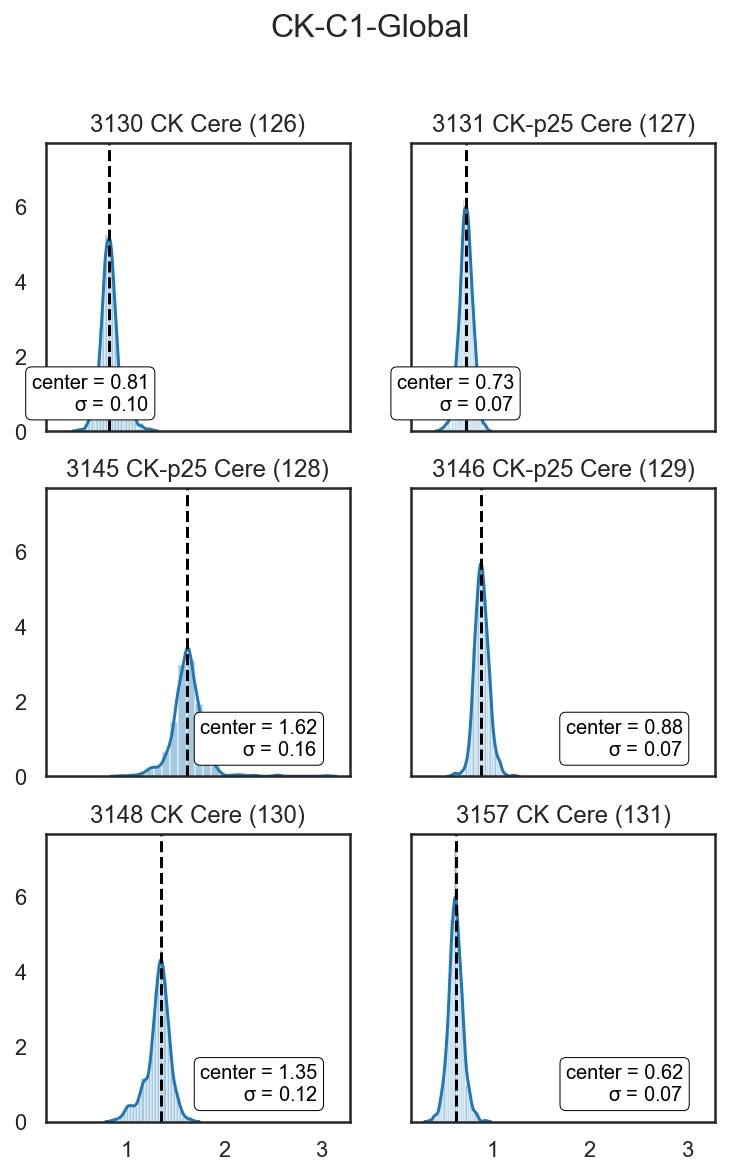

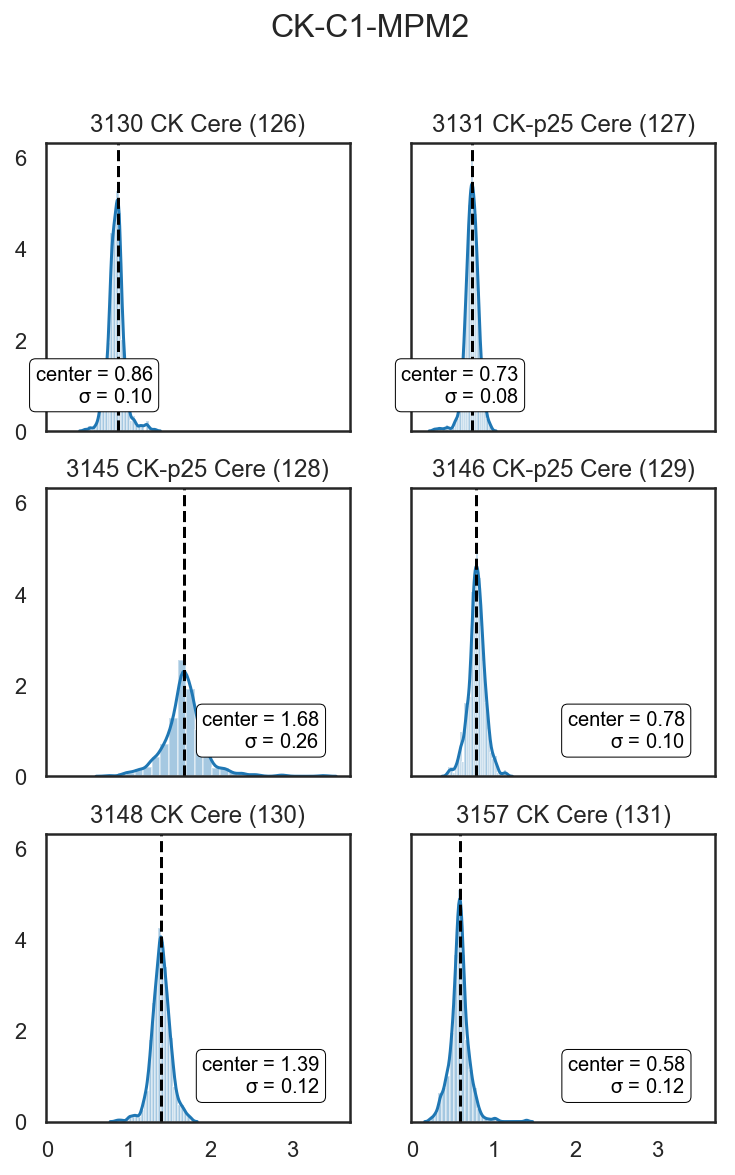

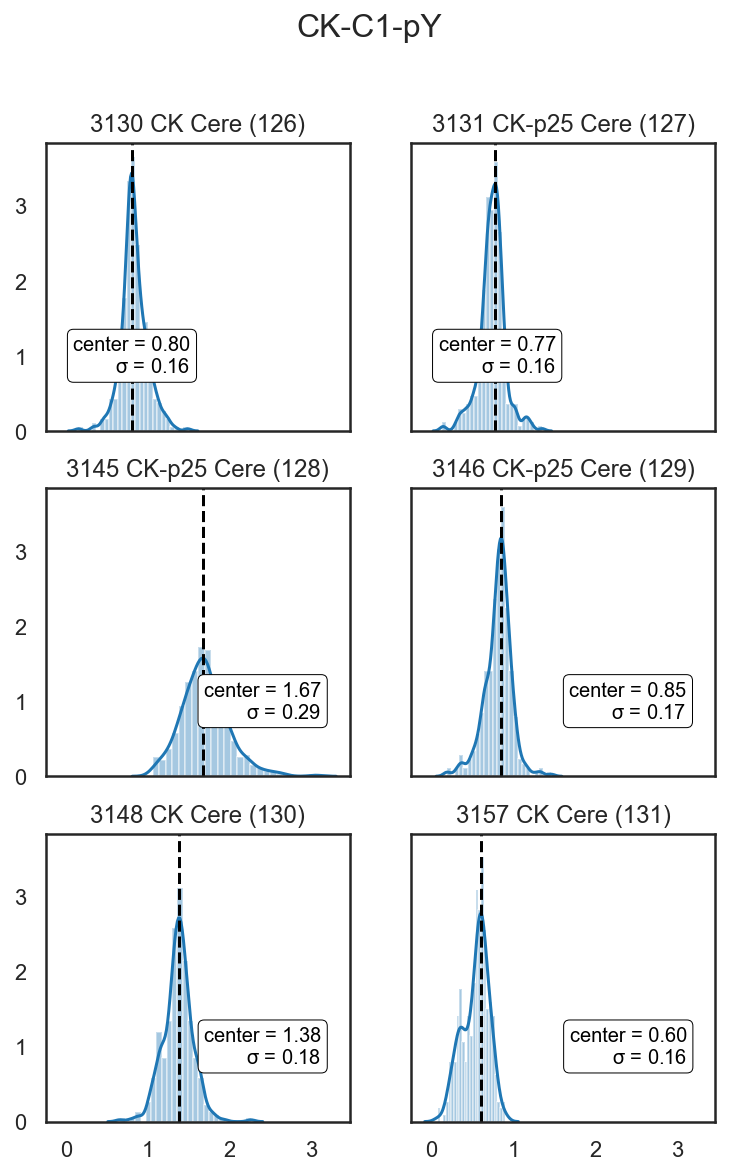

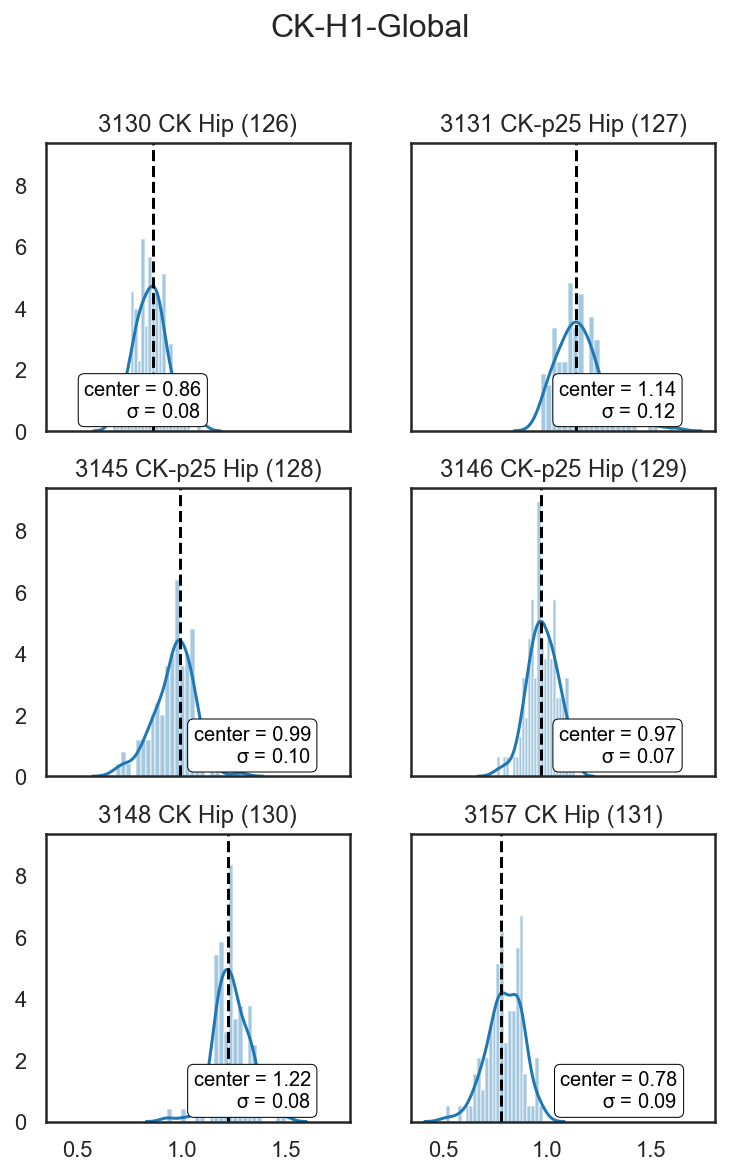

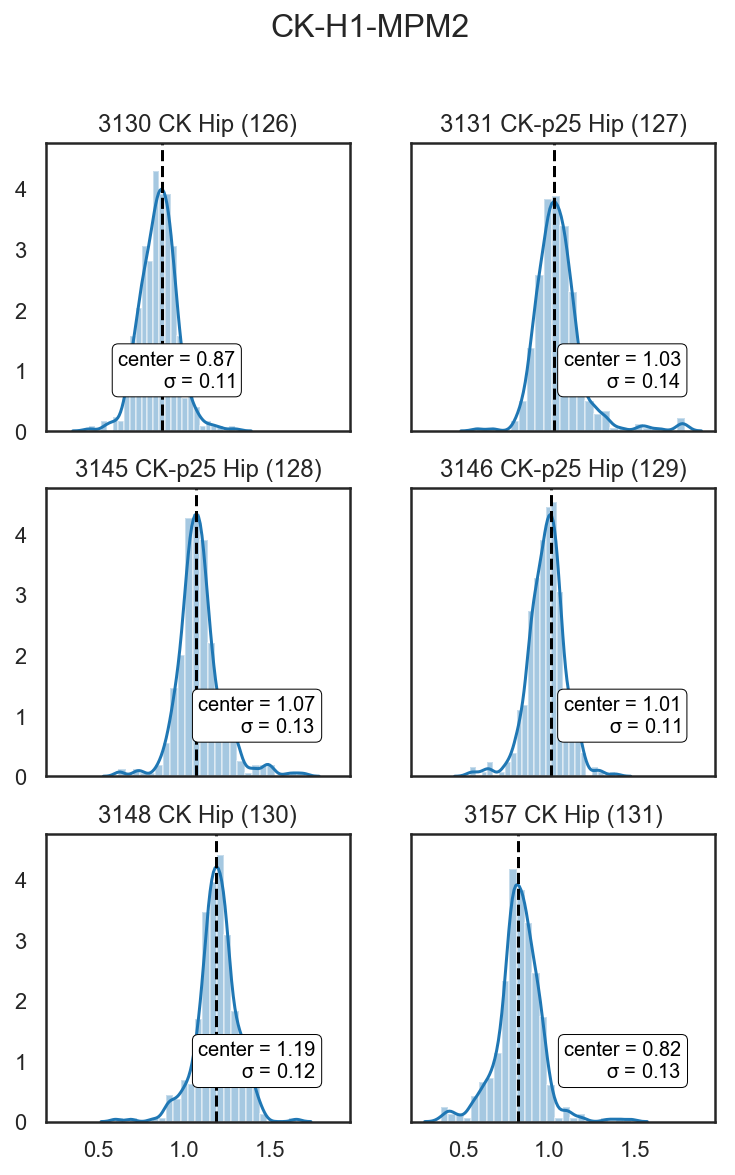

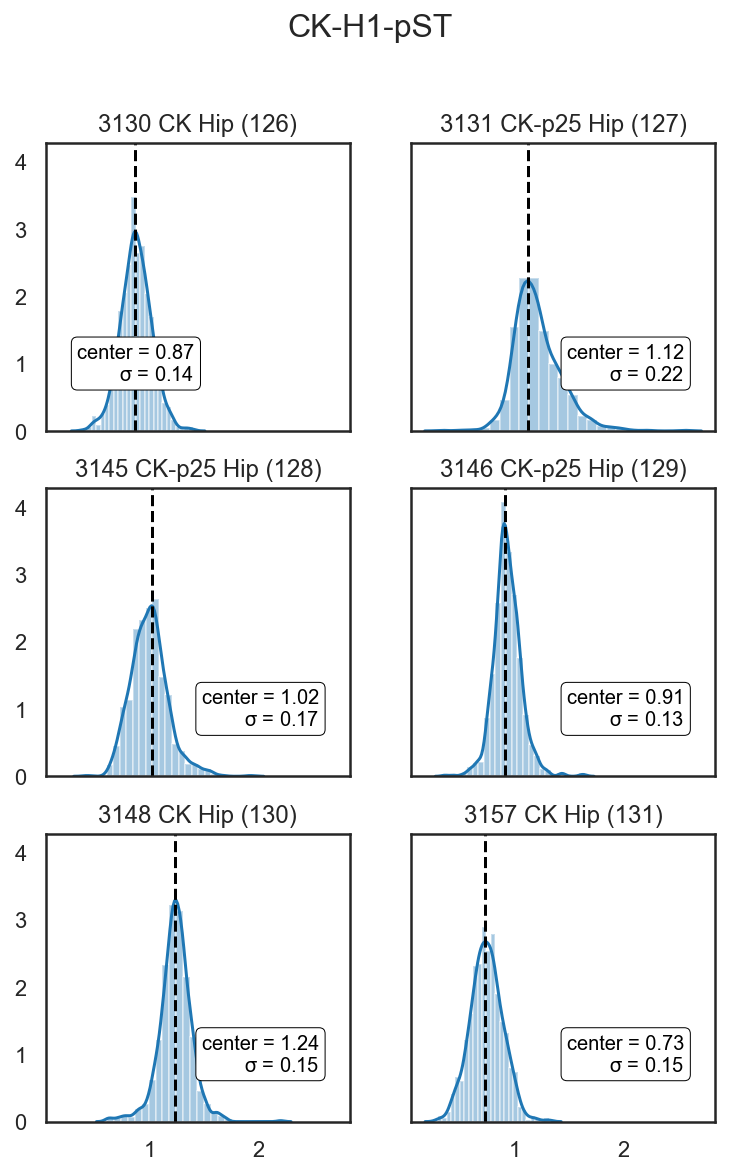

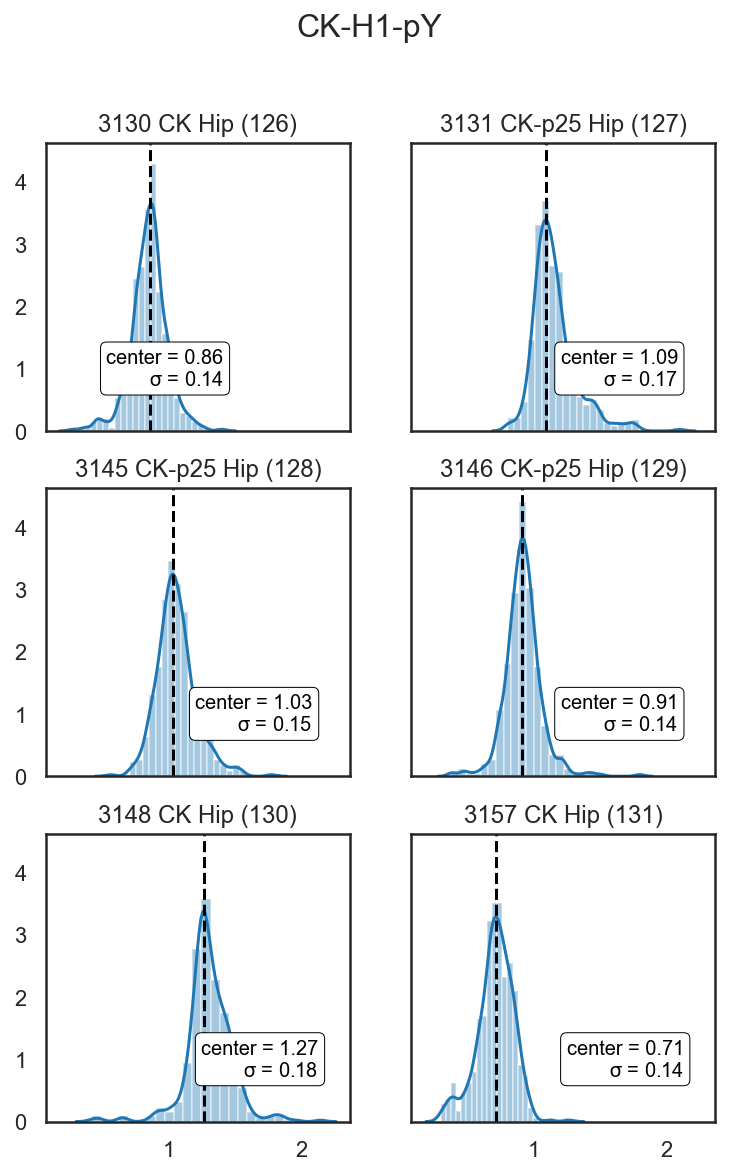

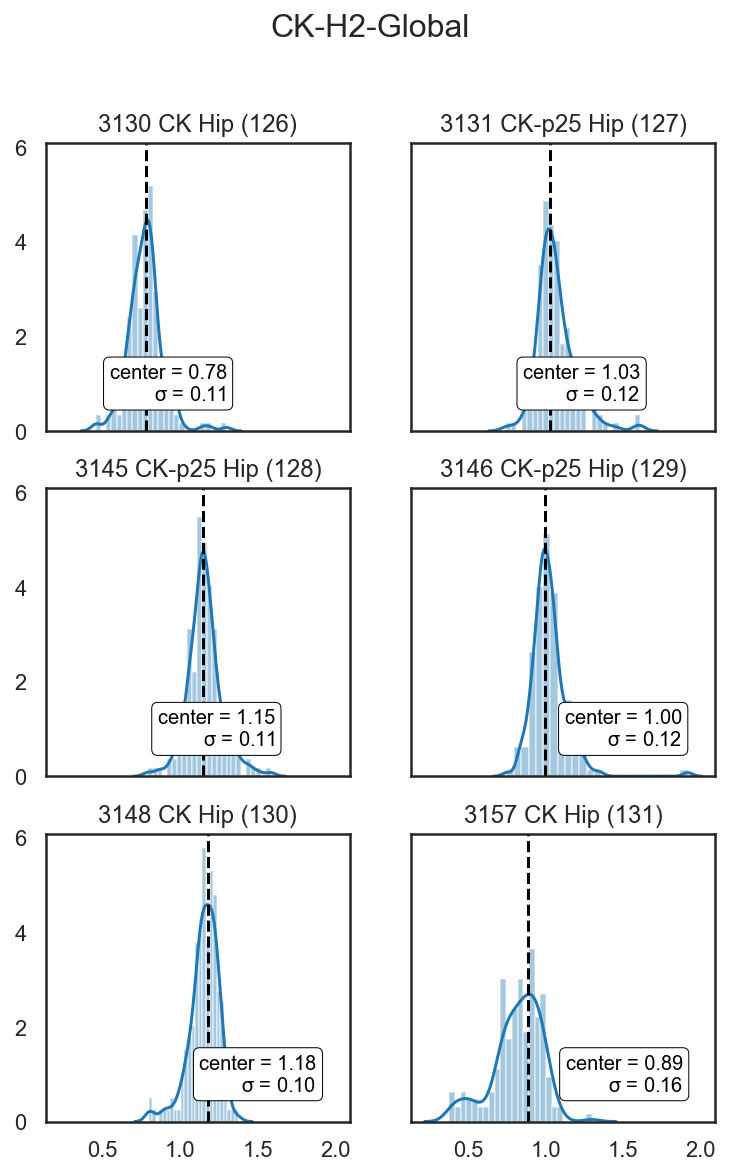

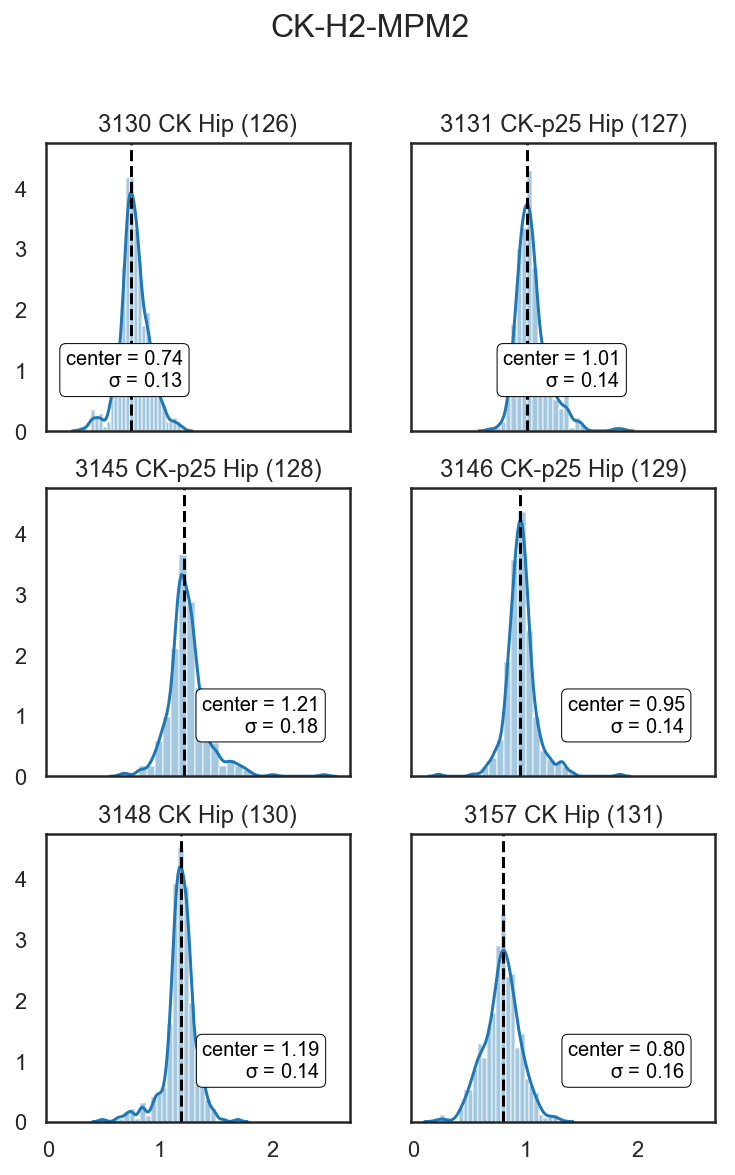

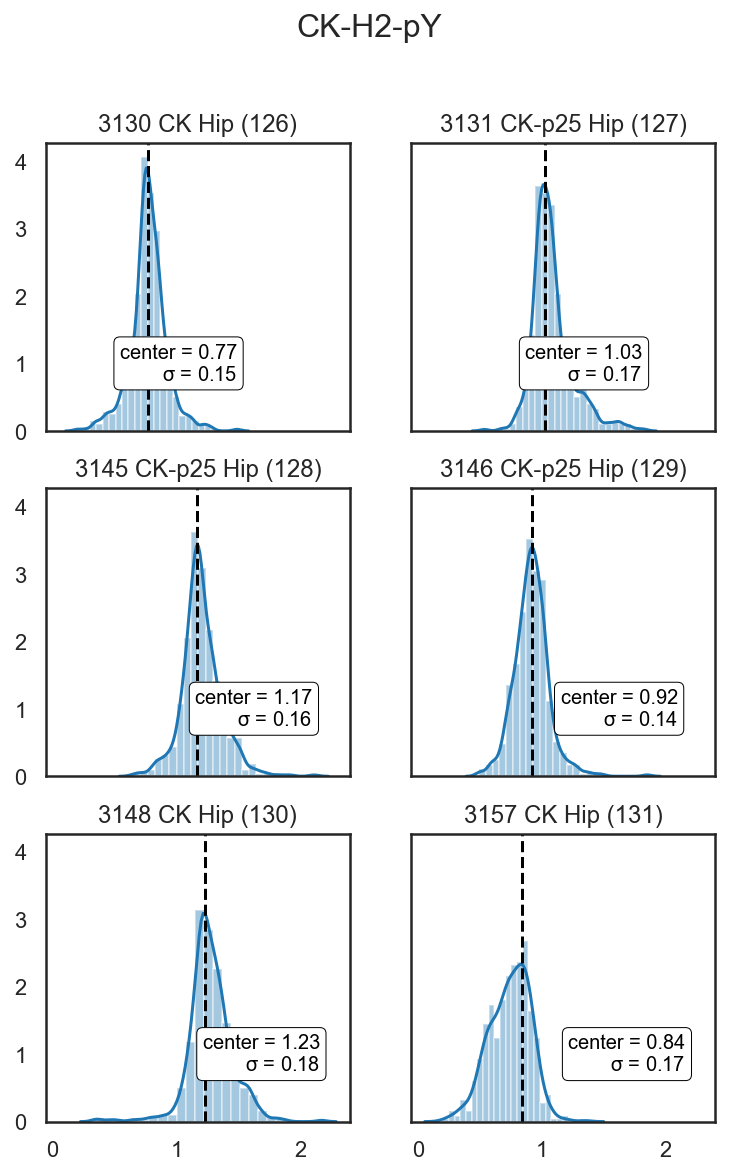

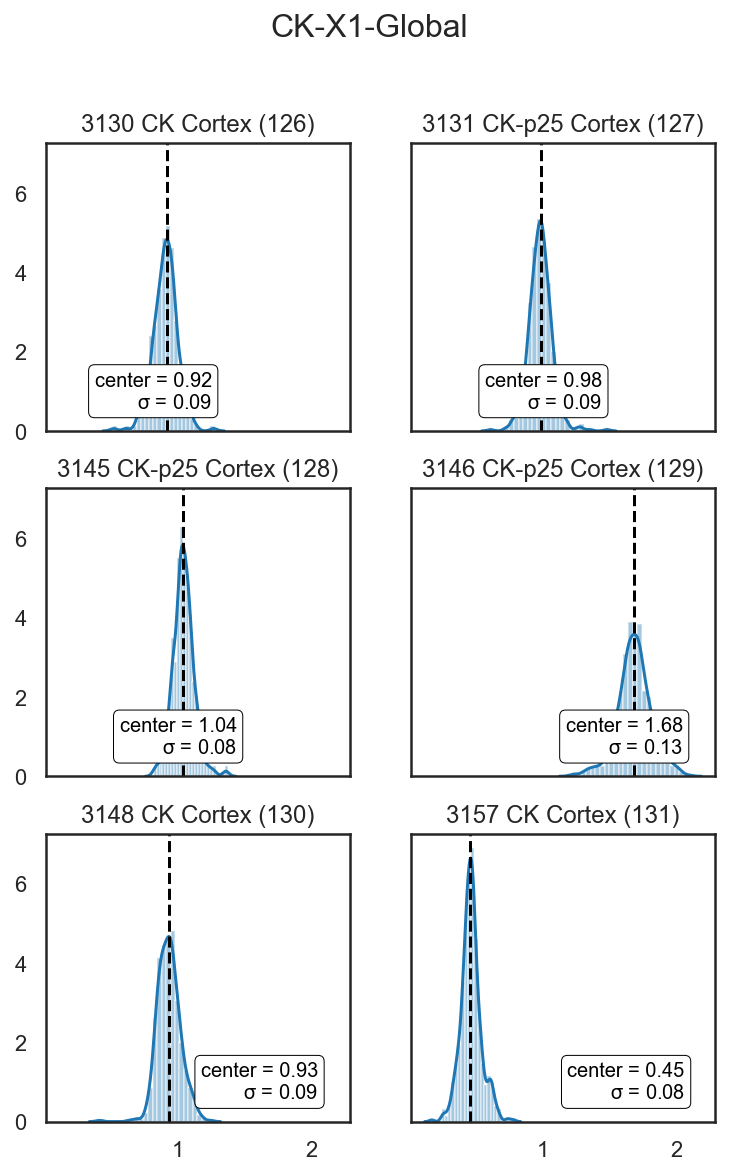

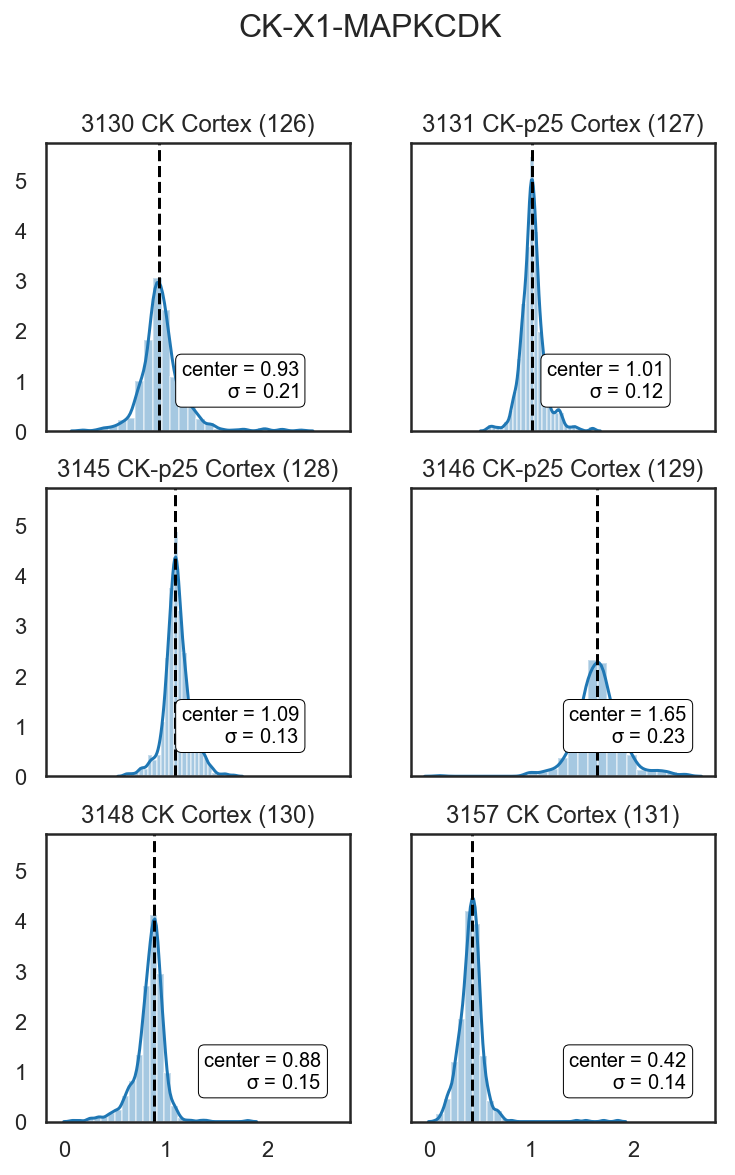

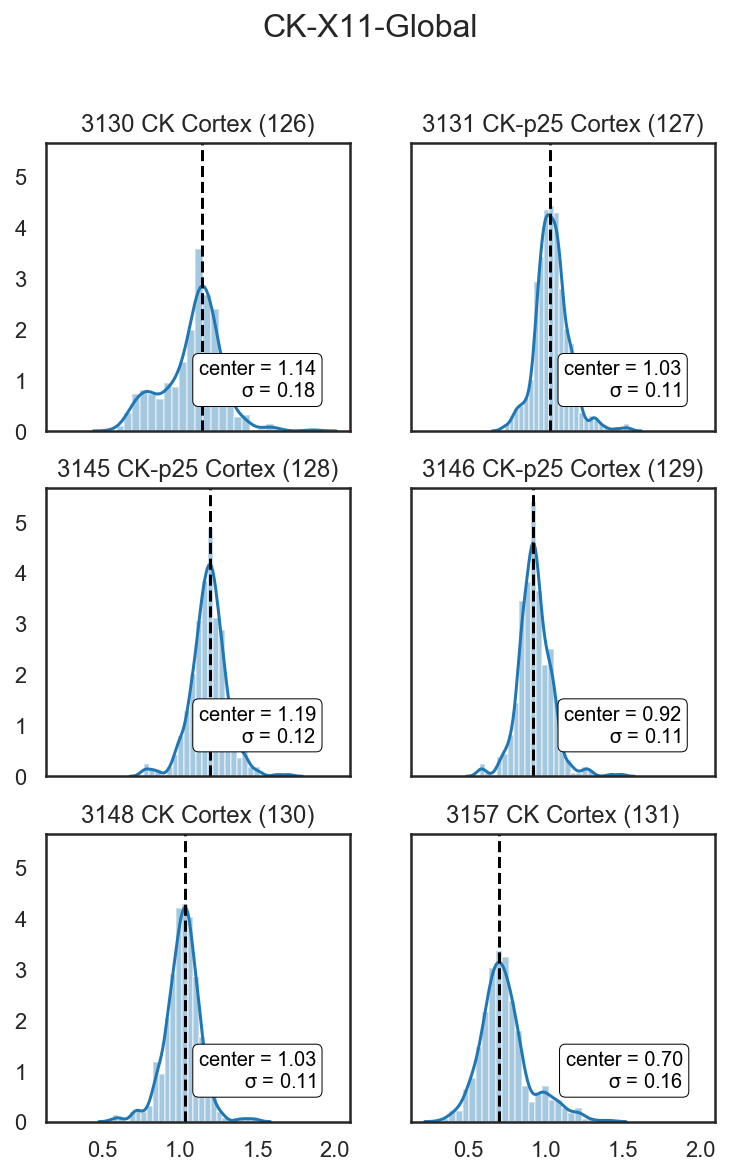

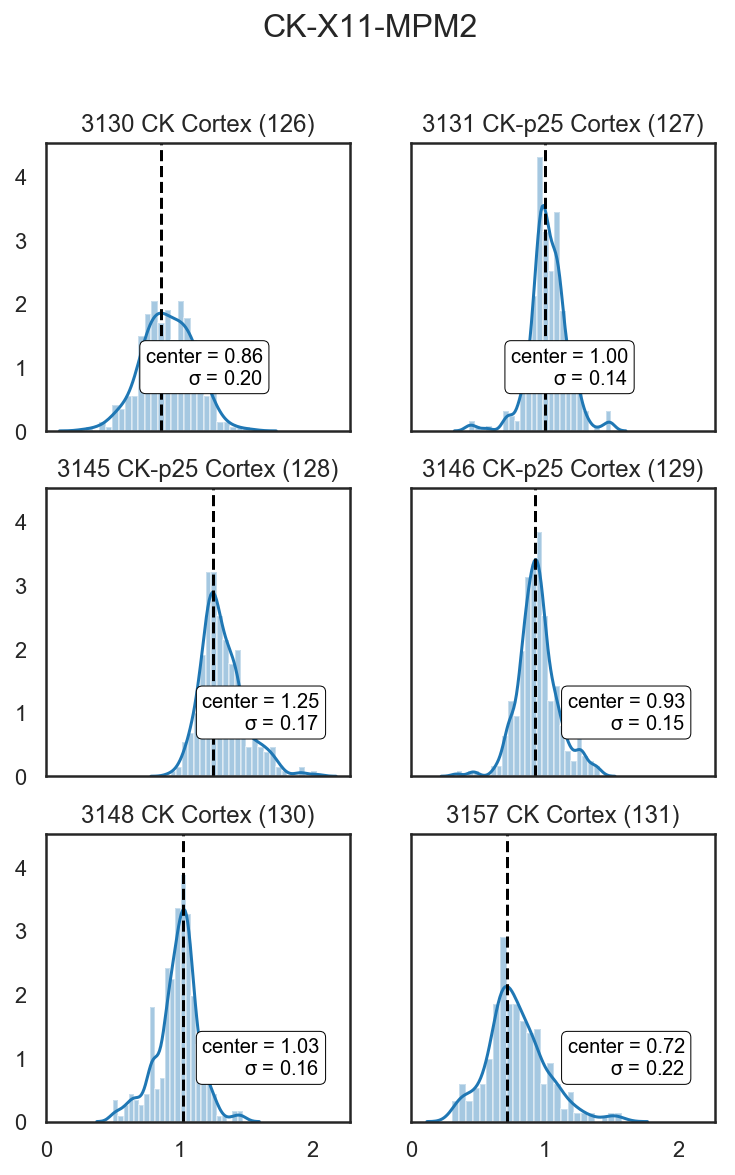

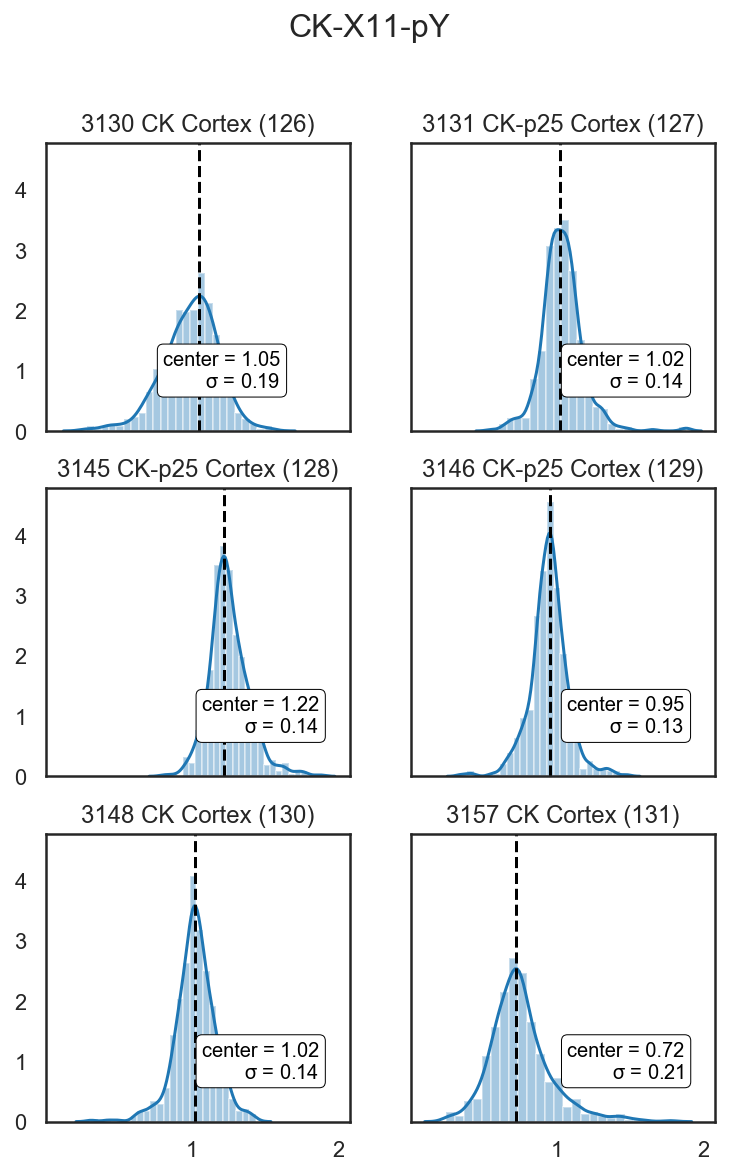

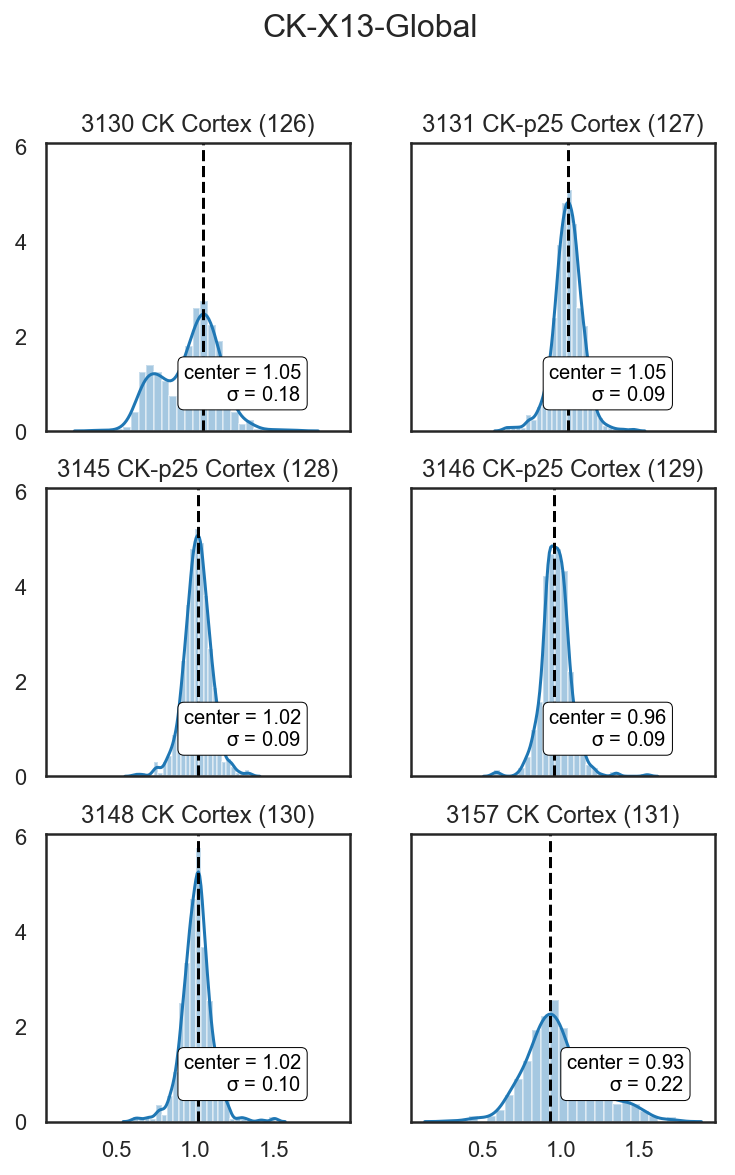

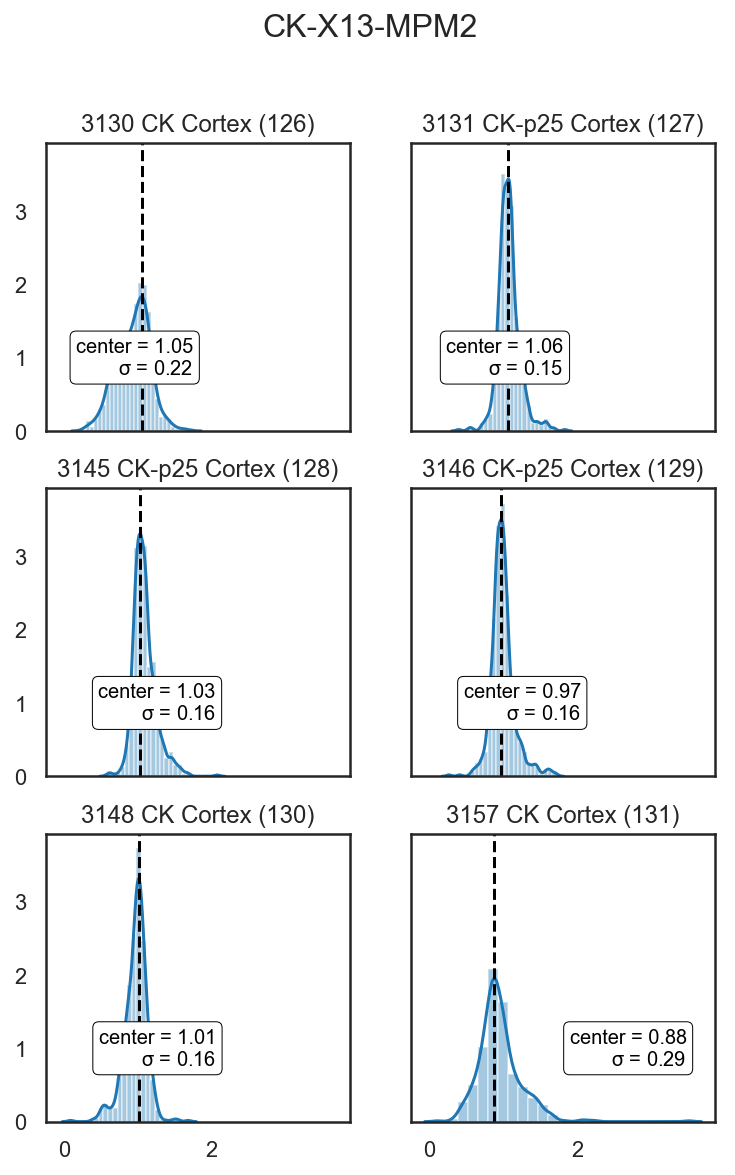

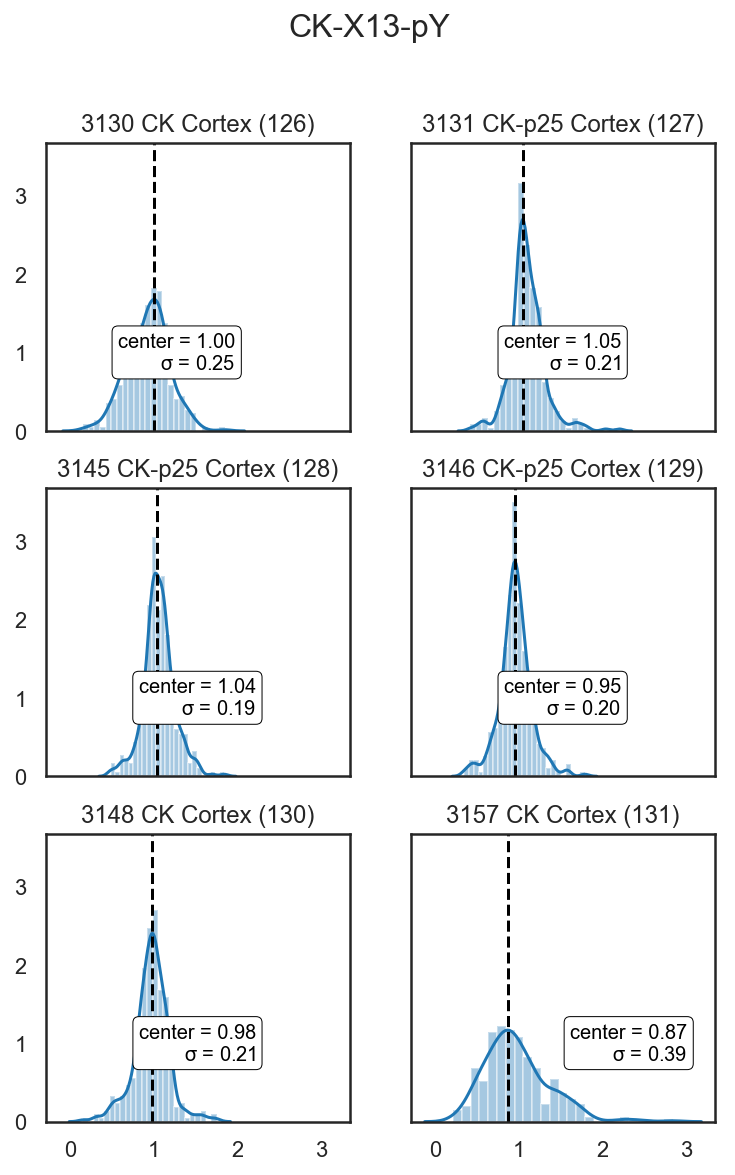

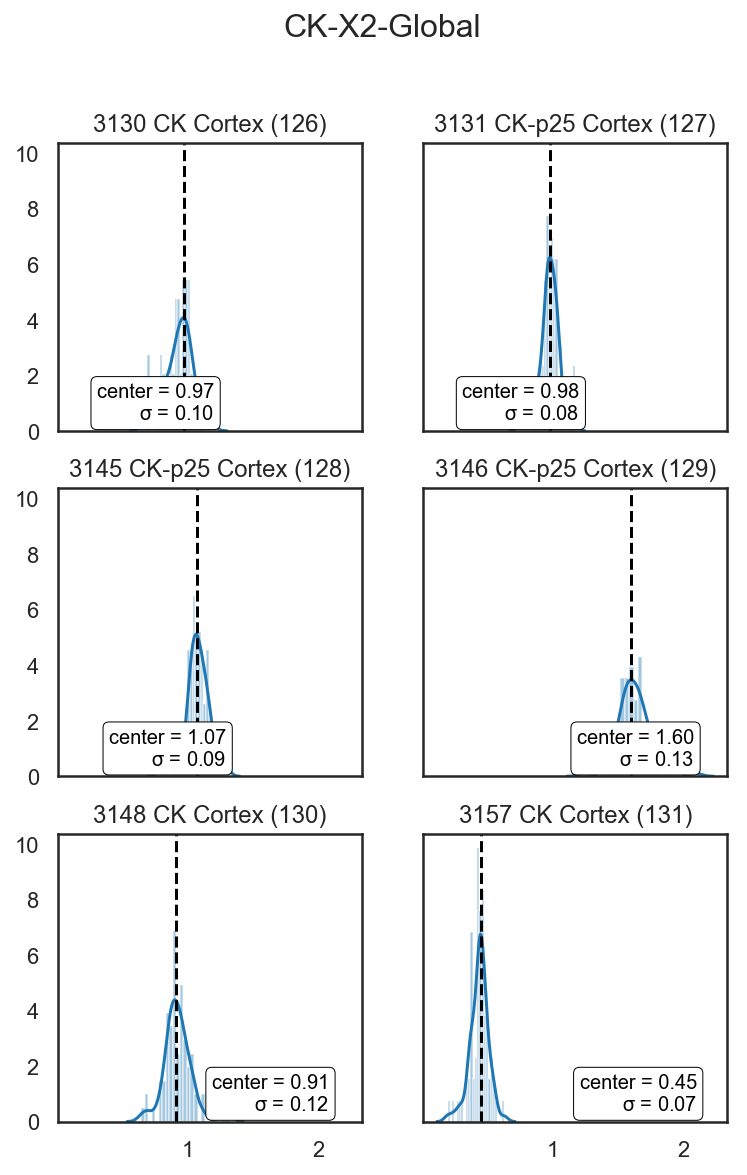

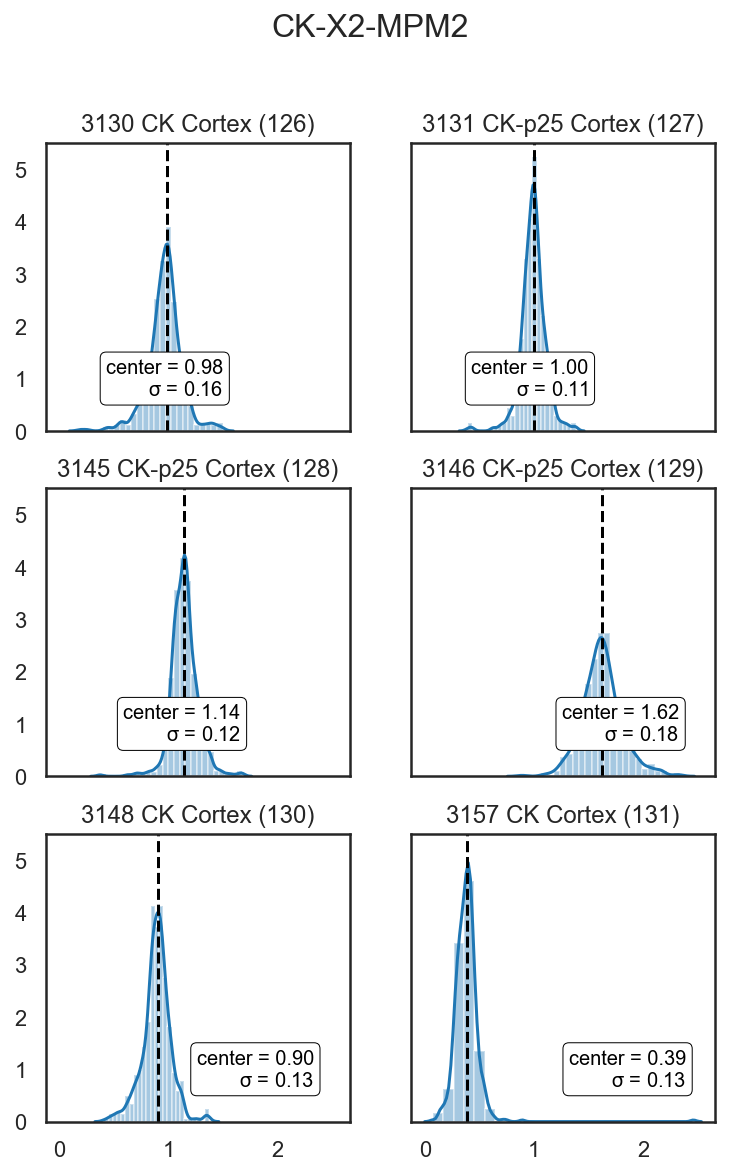

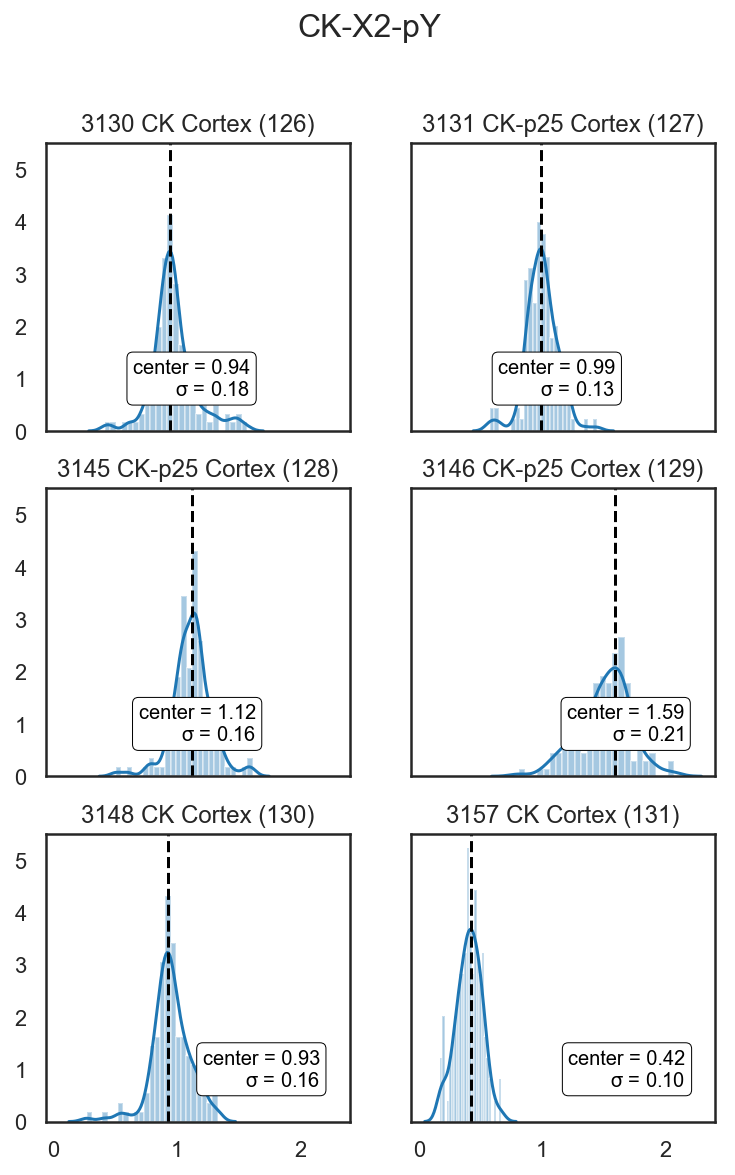

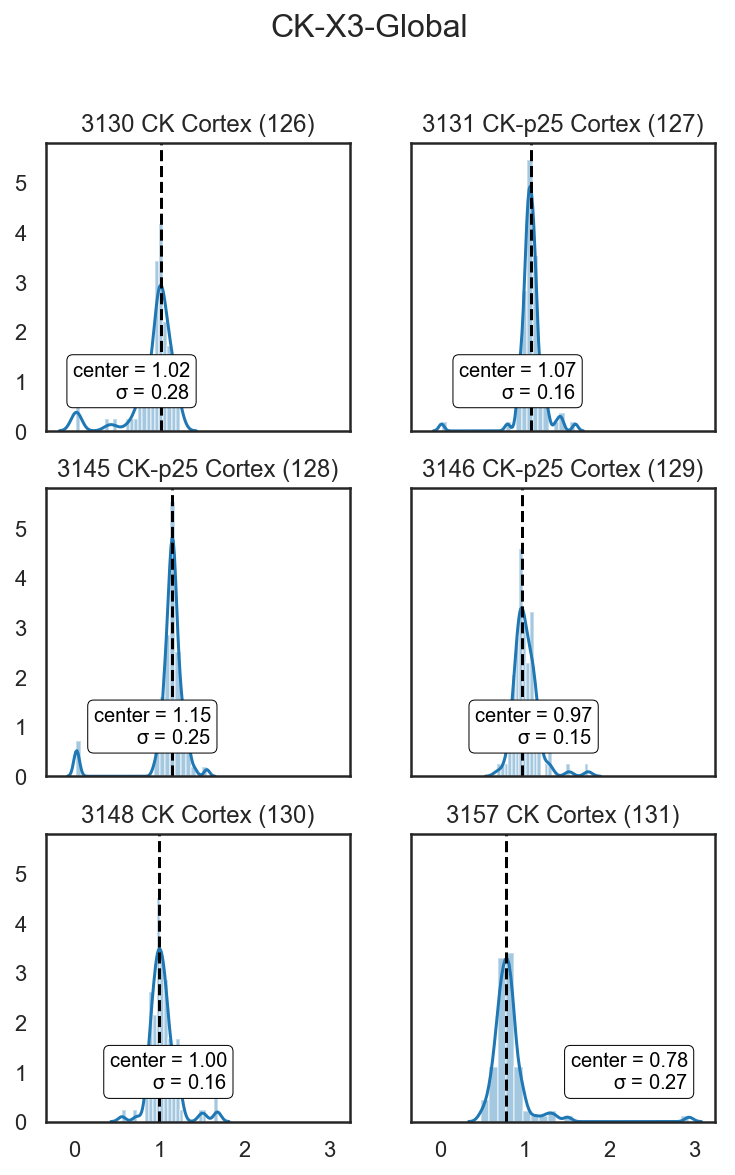

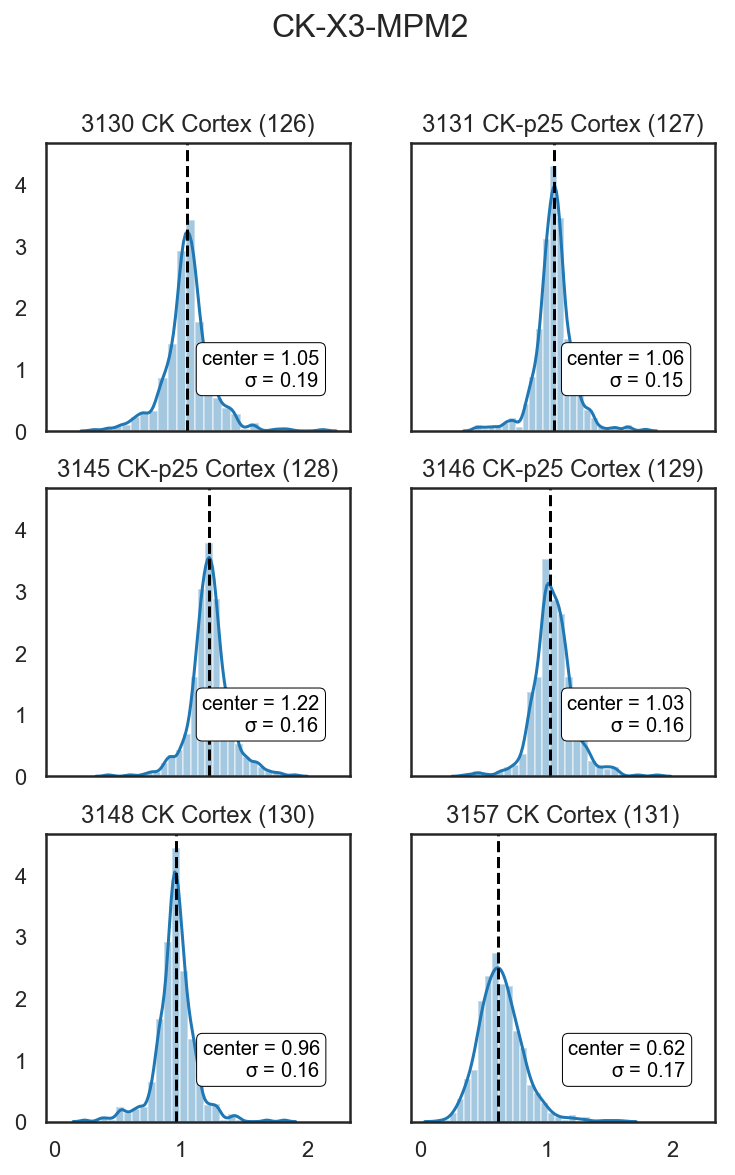

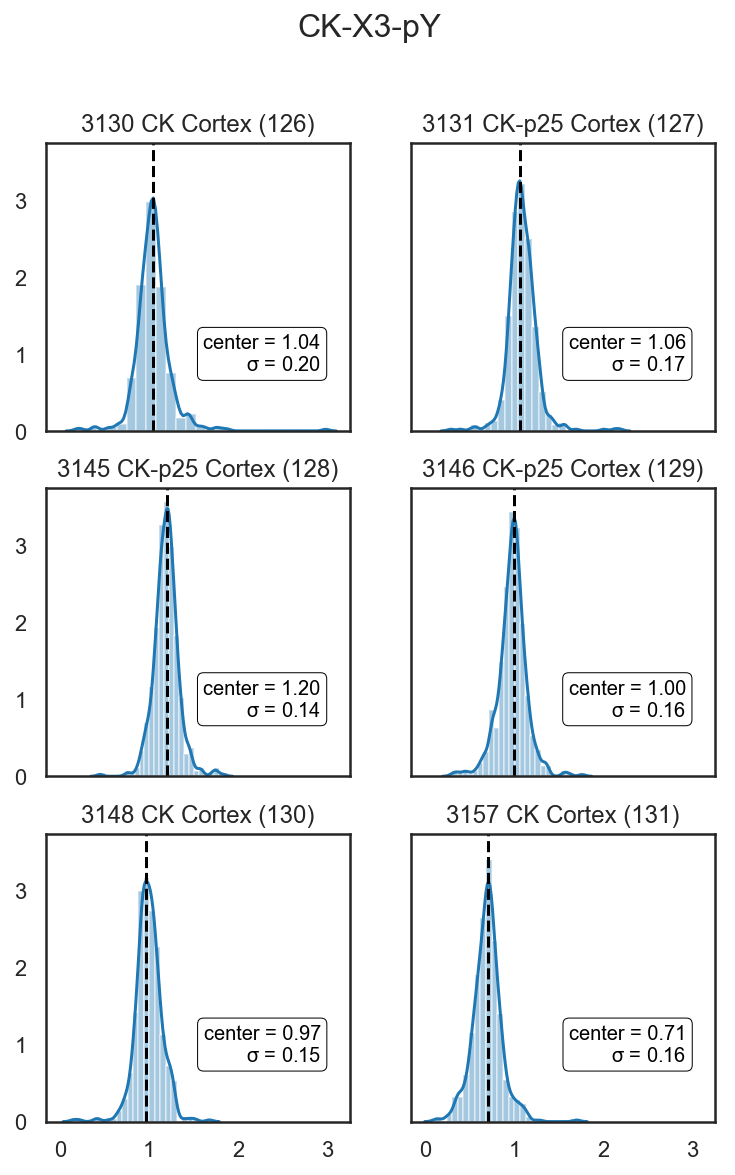

In [3]:
# Import, normalize, and merge together datasets
datas = data_sets.load_all_data(
    chan_mapping={
        "CK-H": ckh_channels,
        "CK-X": ckx_channels,
        "CK-C": ckc_channels,
    },
    norm_mapping="self",
    merge_mapping=OrderedDict([
        ("CKH pY", ["CK-H1-pY", "CK-H2-pY"]),
        ("CKH pST", ["CK-H1-MPM2", "CK-H1-pST", "CK-H2-MPM2"]),
        ("CKH Global", ["CK-H1-Global", "CK-H2-Global"]),
        
        ("CKX pY", ["CK-X2-pY", "CK-X3-pY", "CK-X11-pY", "CK-X13-pY"]),
        ("CKX pST", ["CK-X1-MAPKCDK", "CK-X2-MPM2", "CK-X3-MPM2", "CK-X11-MPM2", "CK-X2-MPM2", "CK-X13-MPM2"]),
        ("CKX Global", ["CK-X1-Global", "CK-X2-Global", "CK-X3-Global", "CK-X11-Global", "CK-X13-Global"]),
        
        ("CKC pY", ["CK-C1-pY"]),
        ("CKC pST", ["CK-C1-MPM2"]),
        ("CKC Global", ["CK-C1-Global"]),
        
        ("CK Hip", ["CKH pY", "CKH pST", "CKH Global"]),
        ("CK Cortex", ["CKX pY", "CKX pST", "CKX Global"]),
        ("CK Cere", ["CKC pY", "CKC pST", "CKC Global"]),
        
        ("CK All", ["CK Hip", "CK Cortex", "CK Cere"]),

    ]),
    groups=ckp25_groups,
)

for name in ["CK Hip", "CK Cortex", "CK All"]:
     print("{}: {}".format(name, datas[name].shape))

utils.save('CK-example-data', datas)

In [4]:
for name in ["CK Hip", "CK Cortex", "CK All"]:
    datas[name] = datas[name].norm_cmp_groups(
        cmp_groups,
    )

    datas[name].update_group_changes(
        group_a=ck_groups,
        group_b=wt_groups,
    )

for name in ["CK Cere"]:
    datas[name] = datas[name].norm_cmp_groups(
        cmp_groups,
    )

    datas[name].update_group_changes(
        group_a="CK-p25 Cere",
        group_b="CK Cere",
    )

-2.5 12.0


11:06:51 PM	pyproteome.volcano	INFO	Plotting volcano labels for 4 peptides
11:06:52 PM	pyproteome.correlation	INFO	Plotting dataset correlation
11:06:52 PM	brainrnaseq.plot	INFO	Plotting cell type enrichments
11:06:55 PM	pyp.motifs.logo	INFO	Generating motif logo


(<Figure size 432x288 with 1 Axes>,
 (<matplotlib.axes._axes.Axes at 0x1f550eadf60>,
  <matplotlib.axes._axes.Axes at 0x1f550ea9940>))

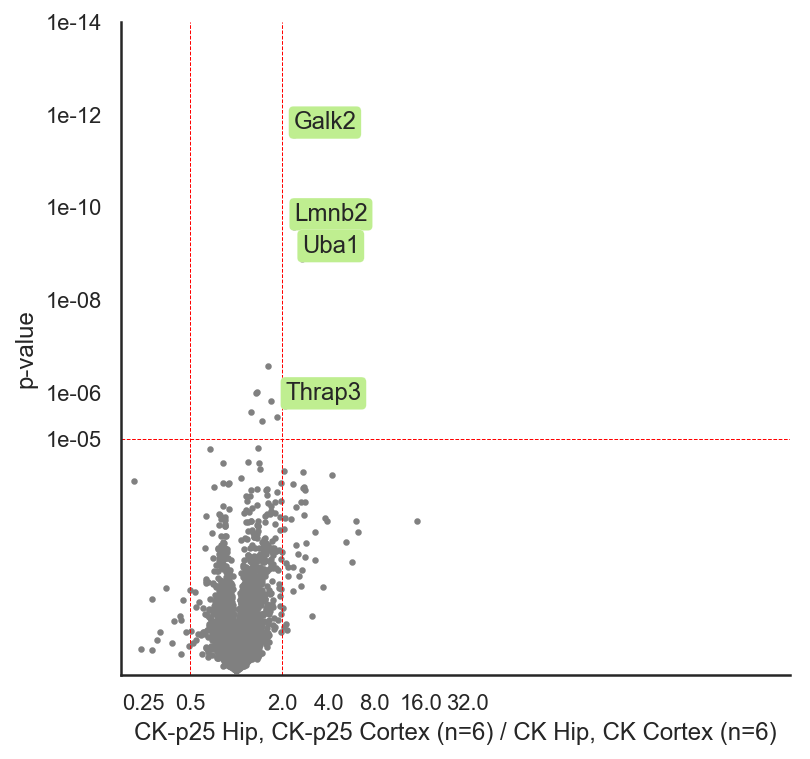

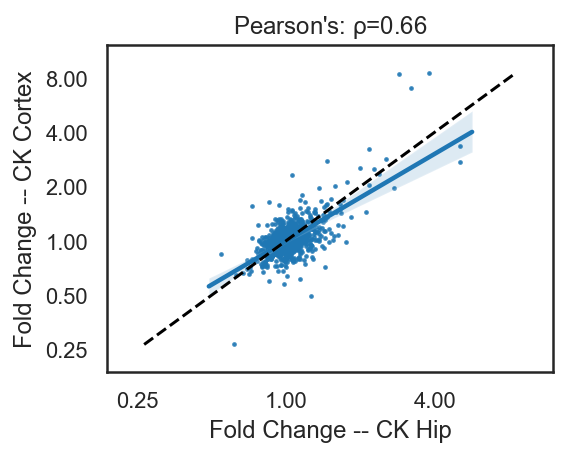

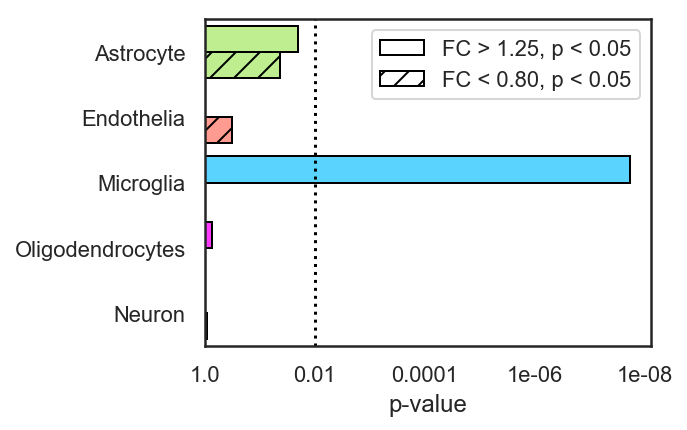

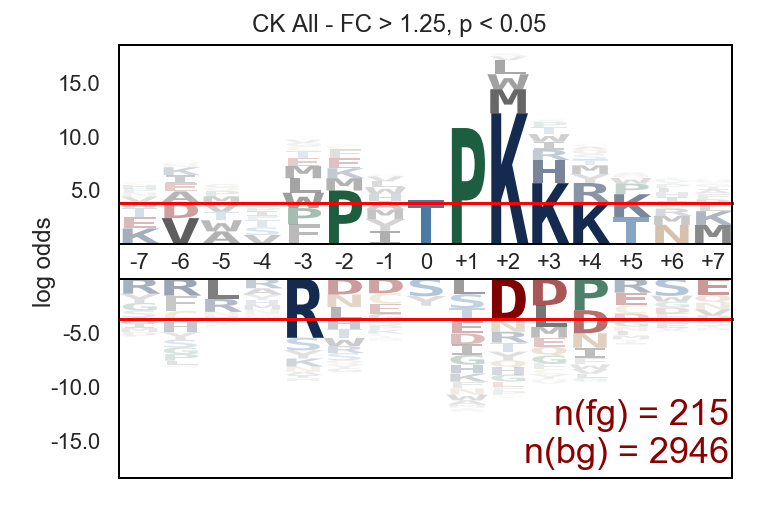

In [23]:
volcano.plot_volcano(
    datas["CK All"],
    p=1e-5,
    fold=2,
)

correlation.correlate_data_sets(
    datas["CK Hip"],
    datas["CK Cortex"],
)

brs.plot.plot_cell_enrichments(
    datas['CK Hip'],
    [
        {'p': .05, 'asym_fold': 1.25},
        {'p': .05, 'asym_fold': 1/1.25},
    ],
)

logo.make_logo(
    datas["CK All"].filter(ambiguous=False),
    {
        'asym_fold': 1.25,
        'p': .05,
    },
)

10:48:33 PM	pyproteome.pathways	INFO	Filtering ambiguous peptides (1721 proteins)
10:48:33 PM	pyproteome.pathways	INFO	Filtered down to 1452 proteins
10:48:33 PM	pyproteome.pathways	INFO	Building list of individual phosphosites
10:48:33 PM	pyproteome.pathways	INFO	Building gene sets (psites=True, remap=True)
10:48:33 PM	pyproteome.pathways	INFO	Loaded 374 gene sets
10:48:33 PM	pyproteome.pathways	INFO	Building correlations using metric 'zscore'
10:48:33 PM	pyproteome.enrichments	INFO	Calculating ranks
10:48:33 PM	pyproteome.enrichments	INFO	Getting gene correlations (2704 IDs)
10:48:33 PM	pyproteome.enrichments	INFO	Filtering gene sets
10:48:33 PM	pyproteome.enrichments	INFO	Filtered 374 gene sets down to 13 with ≥ 15 genes present
10:48:33 PM	pyproteome.enrichments	INFO	Getting gene correlations (2704 IDs)
10:48:33 PM	pyproteome.enrichments	INFO	Calculating ES(S, pi) for 13 gene sets
10:48:36 PM	pyproteome.enrichments	INFO	-- Calculated 10/100 pvals
10:48:36 PM	pyproteome.enrichments	

,name,ES(S),NES(S),p-value,q-value
90,CDK1,0.725049,1.947441,0.000000,0.017241
241,CDK2,0.847303,1.912810,0.000000,0.008621
303,CDK5,0.633395,1.609862,0.000000,0.005747
305,GSK3B,0.651066,1.484025,0.000000,0.012931
124,ERK1,0.584610,1.483999,0.000000,0.010345
199,GSK3A,0.677083,1.465533,0.000000,0.008621
126,PKCA,0.586944,1.272451,0.101695,0.142857
27,ERK2,0.481021,1.267273,0.028571,0.131466
262,Src,0.526225,1.234457,0.111111,0.164751
23,Fyn,0.531094,1.171773,0.190476,0.241379


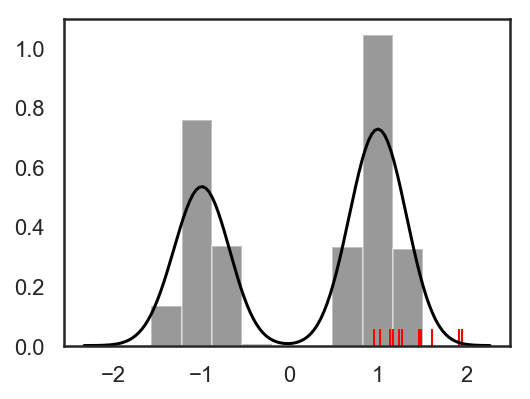

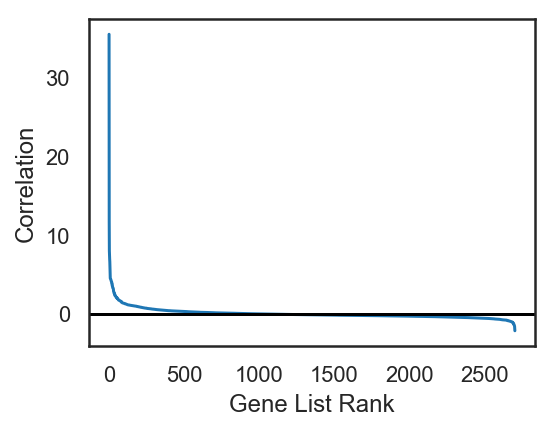

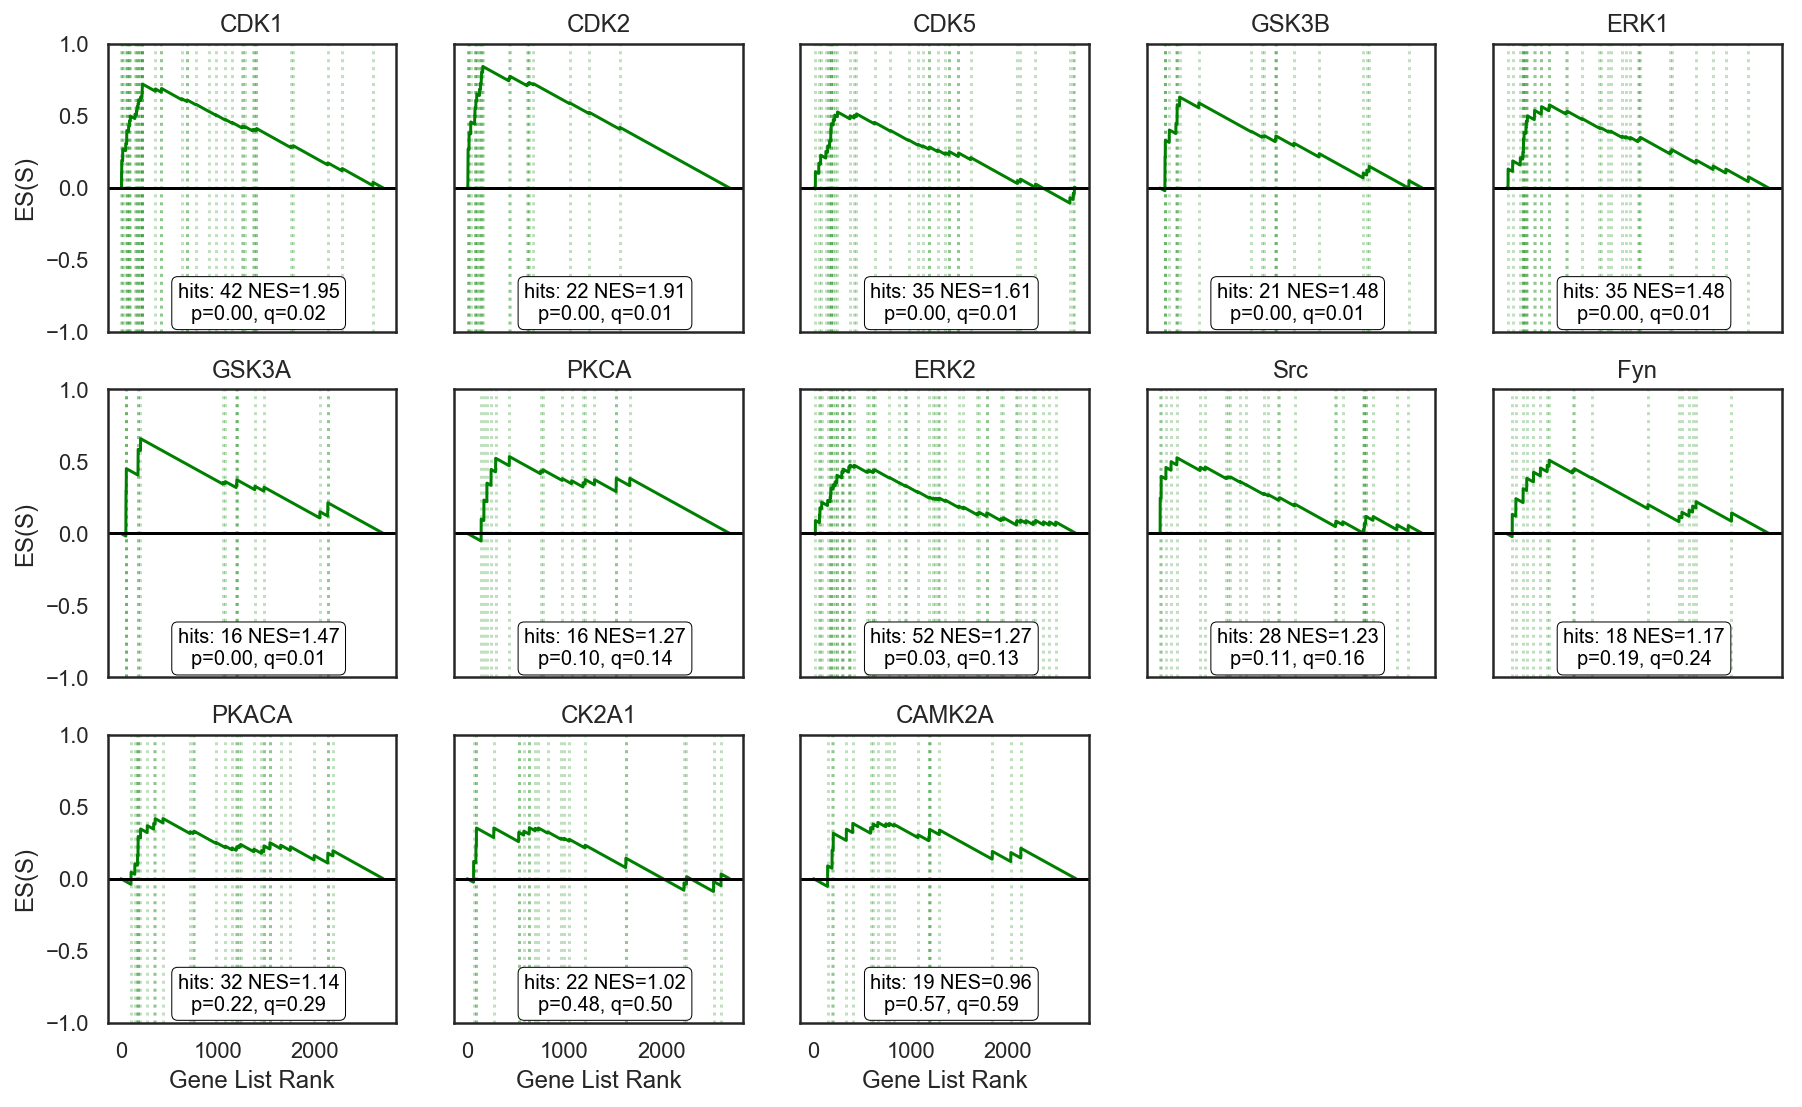

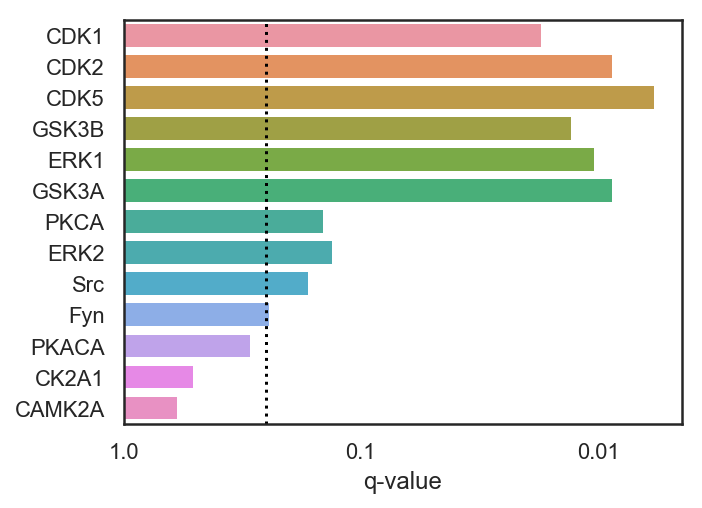

In [15]:
# Run Phosphosite Enrichment analysis
psea_results = pathways.psea(
    ds=datas["CK All"],
    min_hits=15,
    pval=True,
    metric="zscore",
    p_iter=100,
    n_cpus=7,
)
psea_results[0][['name', 'ES(S)', 'NES(S)', 'p-value', 'q-value']]

In [20]:
tables.changes_table(
    datas['CK All'].filter(mod='T', p=1e-3, fold=2),
    sort='Fold Change'
)

,Proteins,Sequence,Fold Change,p-value,Validated,Uniprot Accessions
10,General transcription factor 3C polypeptide 1 (Gtf3c1),"mGItPLK (oxM771, pT774)",15.07,0.000600766,False,Q8K284
4,Histone H1.2 (Hist1h1c) / Histone H1.3 (Hist1h1d),ATGAAtPK (pT146 / pT147),6.03401,0.000588397,False,P15864; P43277
6,Protein bassoon (Bsn),AEPVPKPPPETTVPPGtPK (pT645),3.80598,0.000518486,False,O88737
7,Deoxynucleoside triphosphate triphosphohydrolase SAMHD1 (Samhd1),EQIMGPPItPVKDSLWPYK (pT279),2.81686,0.000228419,False,Q60710
11,Sorbin and SH3 domain-containing protein 2 (Sorbs2),VGIFPISYVEKLtPPEK (pT1001),2.79519,0.000129303,False,Q3UTJ2
8,Ensconsin (Map7),LFVtPPEGSAR (pT277),2.72618,0.000117355,False,O88735
2,Ubiquitin-like modifier-activating enzyme 1 (Uba1),AAVASLLQSVQVPEFtPK (pT800),2.68634,1.29809e-09,False,Q02053
5,Huntingtin (Htt),WWAEVQQtPK (pT1836),2.43955,0.000299944,False,P42859
0,Lamin-B2 (Lmnb2),QVLEGEDIAYKFtPK (pT494),2.38436,2.67475e-10,False,P21619
3,Lamin-B2 (Lmnb2),RQVLEGEDIAYKFtPK (pT494),2.25556,7.05516e-07,False,P21619
